<a href="https://colab.research.google.com/github/singhbipin2117/Insurance-Claim-Prediction/blob/master/Predict_Household_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://works.flyingcursor.com/ml/data.zip

--2019-12-16 16:16:41--  http://works.flyingcursor.com/ml/data.zip
Resolving works.flyingcursor.com (works.flyingcursor.com)... 13.126.6.45
Connecting to works.flyingcursor.com (works.flyingcursor.com)|13.126.6.45|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 301864307 (288M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>] 287.88M  7.52MB/s    in 47s     

2019-12-16 16:17:28 (6.14 MB/s) - ‘data.zip’ saved [301864307/301864307]



In [0]:
# Predict Household Income

In [0]:
# import necessory libraries
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pandas import read_csv
from tensorflow.keras.models import Sequential
from keras.utils import np_utils
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img
import random as rn
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
import tensorflow.keras.models as m
from tensorflow.keras import applications 
import tensorflow.keras

In [0]:
# Data preperation

In [0]:
# loading data
df = pd.read_csv('train.csv')

In [10]:
df.head()

,file,label
0,1,0
1,2,2
2,3,3
3,4,4
4,5,0


In [11]:
# checking for null values
df.isnull().sum()

file     0
label    0
dtype: int64

In [0]:
# There is no null values in datasets

In [13]:
# check number of labels
df['label'].value_counts()

4    1206
3    1101
2    1044
1     976
0     892
Name: label, dtype: int64

In [0]:
# Near by all the labels have same number of input data.

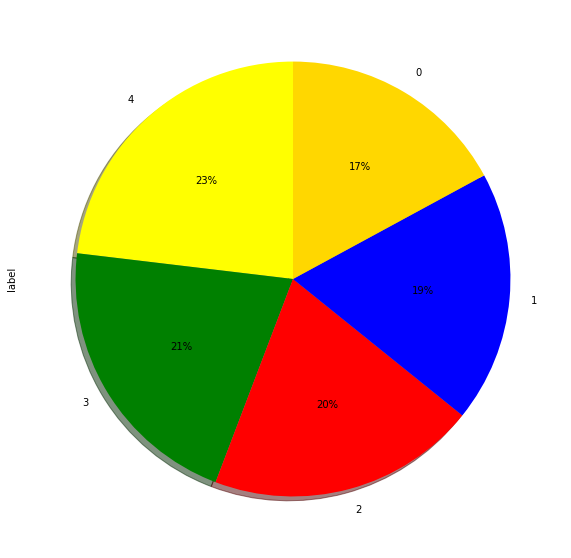

In [15]:
df.label.value_counts().plot(kind='pie', autopct='%1.0f%%', shadow=True, startangle=90, colors=["yellow", "green", "red","blue","gold"], figsize=(10, 10))

In [0]:
# Input data distribution are same across all the labels

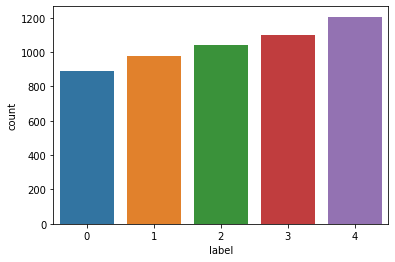

In [17]:
sns.countplot(df.label)

In [0]:
y_train = df.label

In [0]:
import os
cwd = os.getcwd()

In [0]:
# Visualizing some Random Images

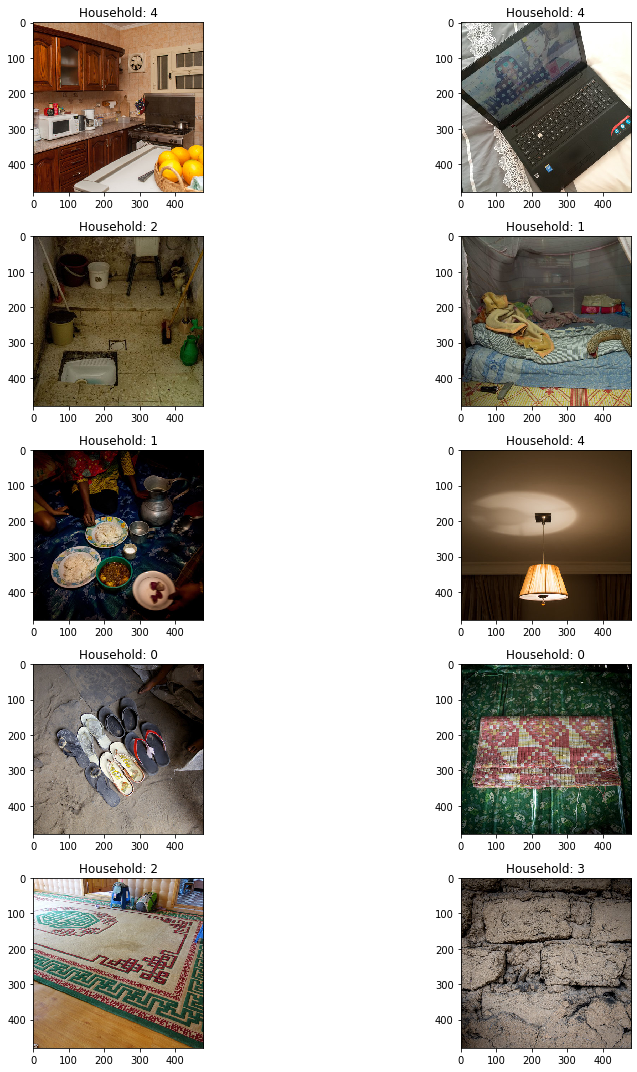

In [21]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.choice(df.file.values)
        img = load_img(os.path.join(cwd,'data','Training_Images','Image-'+str(l)+'.jpg'))
        ax[i,j].imshow(img)
        ax[i,j].set_title('Household: '+str(df.loc[df['file'] == l]['label'].values[0]))
        
plt.tight_layout()

In [0]:
# One hot encode y_Train
y = to_categorical(y_train)

In [0]:
# Reading an image from directory into an numpy array

In [0]:
X = []
IMG_SIZE=160

In [0]:
def make_train_data(flower_name_array):
    for i in flower_name_array:
        path = os.path.join(cwd,'data','Training_Images','Image-'+str(i)+'.jpg')
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))

In [0]:
make_train_data(df.file.values)

In [27]:
print(len(X))

5219


In [0]:
# Splitting into Training and Validation Sets

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

In [0]:
# Building the ConvNet Model

In [31]:
# # modelling starts using a CNN.
prior = tensorflow.keras.applications.vgg19.VGG19(
    include_top=False, 
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

model = Sequential()
model.add(prior)



# model.add(Conv2D(filters = 64, kernel_size = (5,5),strides=(1, 1),activation ='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(filters =32, kernel_size = (3,3),strides=(1, 1),activation ='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(filters = 16, kernel_size = (3,3),strides=(2, 2),activation ='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

# Freeze the VGG16 model, e.g. do not train any of its weights.
# We will just use it as-is.
for cnn_block_layer in model.layers[0].layers:
    cnn_block_layer.trainable = False
model.layers[0].trainable = False

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
80142336/80134624 [==============================] - 3s 0us/step


In [0]:
# Using a LR Annealer

In [0]:
batch_size=128
epochs=10

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.01)

In [0]:
# Data Augmentation to prevent Overfitting

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
        )  # randomly flip images


datagen.fit(x_train)

In [0]:
# Compiling the Keras Model & Summary

In [0]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 5, 5, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3277056   
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 23,302,725
Trainable params: 3,278,341
Non-trainable params: 20,024,384
_________________________________________________________________


In [0]:
# Fitting on the Training set and making predcitons on the Validation set

In [54]:
History = model.fit_generator(datagen.flow(np.array(x_train),np.array(y_train), batch_size=batch_size),
                              epochs = epochs, validation_data = (np.array(x_test),np.array(y_test)),
                              verbose = 1, steps_per_epoch=np.array(x_train).shape[0] // batch_size, shuffle=True)

Epoch 1/10
 9/28 [========>.....................] - ETA: 9:04 - loss: 1.1203 - acc: 0.5130

KeyboardInterrupt: ignored

In [45]:
History

NameError: ignored